# 1. Basics

- Types of Test
  - Parametric Test: F-Test, T-Test, Chisquare Test etc.
  - Non-Parametric Test: Wilcoxon Signed Rank Test, Wilcoxon Mann-Whitney Test etc.

In [241]:
# Import modules
import numpy as np
from scipy import stats

In [242]:
# Set a seed value for generating data
np.random.seed(85)

In [246]:
# Generate data for Parametric Test
n = 100
mu1, mu2 = 0, 0.5
sigma = 1  # Standard Deviation

data1 = np.random.normal(mu1, sigma, n)
data2 = np.random.normal(mu2, sigma, n)

print(data1, '\n\n', data2)

[ 1.09740483  0.48224082  1.16098554 -1.81012048 -0.17083514 -0.46475191
 -0.04462753 -0.11105329  1.02667408  0.82179571 -0.56920665  0.47366898
  0.39282553  0.13103469 -0.65744079 -2.8091279  -0.27404052  0.61582963
  0.71557674 -0.10684312 -0.94565994  1.45340552  0.34169834 -0.58114441
 -1.34964622 -0.18072724  0.4735927   0.66551799 -0.89215085  1.38442531
 -1.36774204  0.47484834 -1.03756071  0.80964764 -0.00759035 -1.01439124
  1.05443854  1.16120581 -0.04374062 -0.89595832  0.4329888  -1.37856734
 -0.55556026 -0.6102964   0.28548646 -0.09563741 -0.11139272  0.35306849
  1.02545205  0.36647611  0.72973014 -1.21733738  0.03004547  0.38283129
  0.57901588  0.91562634 -0.62990218  1.50454138  0.34460013  1.30930449
  1.48942179 -0.01200785 -0.06236575  0.6198047  -0.7439319  -0.13394662
 -1.37113893 -2.2161088  -1.43966832  0.07506983  0.90231394  2.3612634
  0.00846748  0.94915475  0.29919191 -0.11216344 -0.85222485 -1.37921749
  1.44889516  0.09614337  0.13875489 -0.69369025  0.

In [247]:
# Generate data for Non-Parametric Test
m = 3
data3 = np.random.uniform(0, 1, m)
data4 = np.random.uniform(0.5, 1.5, m)

print(data3, '\n\n', data4)

[0.75873764 0.56220321 0.6732811 ] 

 [0.55011963 0.93790722 0.97530613]


In [249]:
# Parametric Test: T-Test 
t_stat, p_val = stats.ttest_ind(data1, data2)

print('T-Statistic: {:.3f}, \nP-Value: {:.3f}'.format(t_stat, p_val))

T-Statistic: -3.645, 
P-Value: 0.000


In [251]:
# Non-Parametric Test: Mann-Whitney U Test
u_stat, p_val = stats.mannwhitneyu(data3, data4)

print('U-Statistic: {:.3f}, \nP-Value: {:.3f}'.format(u_stat, p_val))

U-Statistic: 3.000, 
P-Value: 0.700


# 2. Sign Test

In [252]:
# Import modules
import numpy as np
from scipy.stats import binom_test

In [253]:
# Generate data
np.random.seed(85)

n = 20
mu = 9
data = np.random.normal(mu, size=n)

data

array([ 9.17685072, 11.37775412,  9.99873286,  7.6898492 ,  9.18018992,
        7.23524598,  7.55687413,  7.60071444,  9.820354  , 10.29529932,
        9.94219742,  8.76806771,  8.36860203,  8.35782298,  8.6183284 ,
        7.236556  , 10.61166821,  8.12189161,  8.50142293,  9.9072434 ])

In [254]:
# Set a test value(mu0)
mu0 = 9

# Calcualte values bigger than `mu0`
n_above_mu0 = sum(data > mu0)

n_above_mu0

9

In [258]:
# Sign Test
p_val = binom_test(n_above_mu0, n=n)

print(f'Number of Data above mu0: {n_above_mu0}')
print(f'Result of Binomial Test: {p_val}')

Number of Data above mu0: 9
Result of Binomial Test: 0.8238029479980469


C:\Users\genih\AppData\Local\Temp\ipykernel_8788\1118505637.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_val = binom_test(n_above_mu0, n=n)


# 3. Wilcoxon Signed Rank Test

## 3.1. Basics

In [3]:
# Import modules
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

In [4]:
# Generate Data
data1 = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
data2 = [10, 20, 25, 30, 35, 40, 45, 50, 55, 60]

- stat: Difference of ranks between two groups
   - Similar groups: smaller 'stat' value
   - Different groups: bigger 'stat' value
- p: Significance to reject null hypotheses in the results

In [5]:
# Wilcoxon Signed Rank Test
stat, p = wilcoxon(data1, data2)


print('stat:', stat, '\np-value: ', p)


stat: 0.0 
p-value:  0.001953125


In [6]:
# Adopt or Reject Null Hypothesis

# `alpha` value
alpha = 0.05

if p < alpha:
    print(f"P-value is {p: .4f}, so Null Hypothesis(H0) is rejected.")
else:
    print(f"p-value: {p: .4f}, Null Hypothesis(H0) is adopted")

P-value is  0.0020, so Null Hypothesis(H0) is rejected.


## 3.2. Evaluation of the Effectiveness of Treatments 

In [7]:
# Import modules

import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

In [158]:
# Generate Dummy Data
pre_treatment = np.random.randint(1, 20, size=20)
post_treatment = np.random.randint(1, 10, size=20)

In [159]:
# Create a DataFrame
data = pd.DataFrame ({
                        "pre_treatment" : pre_treatment,
                        "post_treatment" : post_treatment
                     })

data

,pre_treatment,post_treatment
0,5,1
1,7,6
2,12,1
3,8,9
4,15,6
5,18,5
6,9,8
7,2,4
8,13,4
9,9,6


In [160]:
# Save as a file
data.to_csv('./data/treatment_data.csv', index=False, encoding='utf-8')

In [161]:
# Check the data
treatment_data = pd.read_csv('./data/treatment_data.csv')

treatment_data

,pre_treatment,post_treatment
0,5,1
1,7,6
2,12,1
3,8,9
4,15,6
5,18,5
6,9,8
7,2,4
8,13,4
9,9,6


In [162]:
# Wilcoxon Signed Rank Test
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print('stat:', stat, '\np-value: ', p)

stat: 19.5 
p-value:  0.0007076263427734375


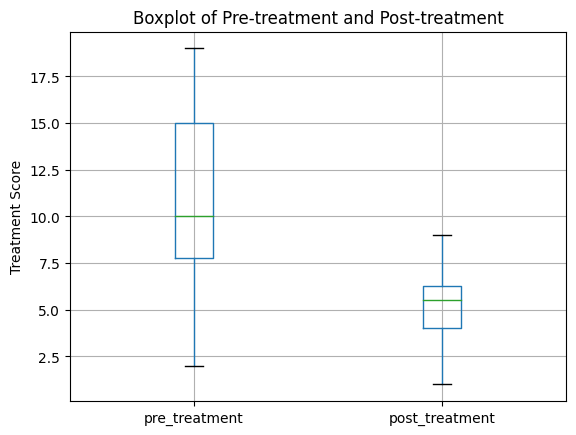

In [163]:
# Visualization: Boxplot
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

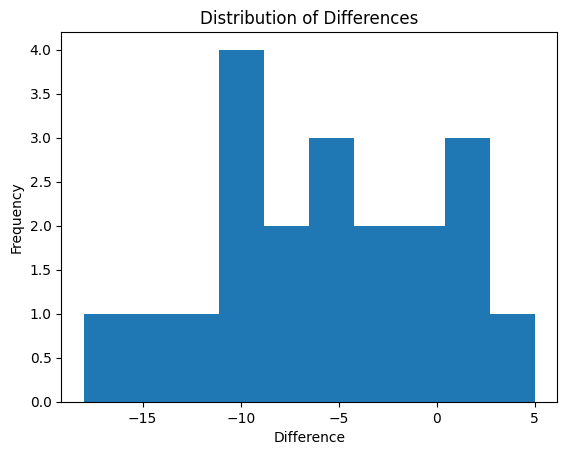

In [164]:
# Visualization: Histogram
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()

## 3.3. Non-normal Dataset 

In [15]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
# Generate data

np.random.seed(85)

pre_treatment = np.random.rand(20)+1
post_treatment = np.random.rand(20)+2

print('Pre Treatment: ', pre_treatment)
print('Post Treatment: ', post_treatment)

Pre Treatment:  [1.62037381 1.50895307 1.29824484 1.65379871 1.27350653 1.52312608
 1.37324974 1.36927859 1.7346936  1.64863888 1.92579673 1.22714814
 1.40555275 1.88368074 1.20890112 1.21378726 1.28344035 1.45312884
 1.33757139 1.01173726]
Post Treatment:  [2.39694687 2.68914231 2.83520331 2.31578849 2.71918911 2.50498986
 2.3674922  2.18296085 2.53665916 2.03160998 2.59859214 2.77609494
 2.22372453 2.62627289 2.41232011 2.62107257 2.23957974 2.30725726
 2.25829266 2.09376532]


In [176]:
# Create a DataFrame
data = pd.DataFrame ({
                        "pre_treatment" : pre_treatment, 
                        "post_treatment" : post_treatment})

data

,pre_treatment,post_treatment
0,1.620374,2.396947
1,1.508953,2.689142
2,1.298245,2.835203
3,1.653799,2.315788
4,1.273507,2.719189
5,1.523126,2.504990
6,1.373250,2.367492
7,1.369279,2.182961
8,1.734694,2.536659
9,1.648639,2.031610


In [177]:
# Save as a `csv` file
data.to_csv('./data/non_normal_data.csv', index=False)

In [178]:
# Check the csv file
data = pd.read_csv('./data/non_normal_data.csv')

data

,pre_treatment,post_treatment
0,1.620374,2.396947
1,1.508953,2.689142
2,1.298245,2.835203
3,1.653799,2.315788
4,1.273507,2.719189
5,1.523126,2.504990
6,1.373250,2.367492
7,1.369279,2.182961
8,1.734694,2.536659
9,1.648639,2.031610


In [179]:
# Wilcoxon Signed Ranked Test
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print('stat:', stat, '\np-value: ', p)

stat: 0.0 
p-value:  1.9073486328125e-06


In [180]:
# Adopt or Reject Null Hypothesis
alpha = 0.05

if p < alpha:
    print(f"P-value is {p: .4f}, so it's a different distribution (H0 rejected)")
else:
    print(f"p-value: {p: .4f}, so it's the same distribution (H0 is adopted")

P-value is  0.0000, so it's a different distribution (H0 rejected)


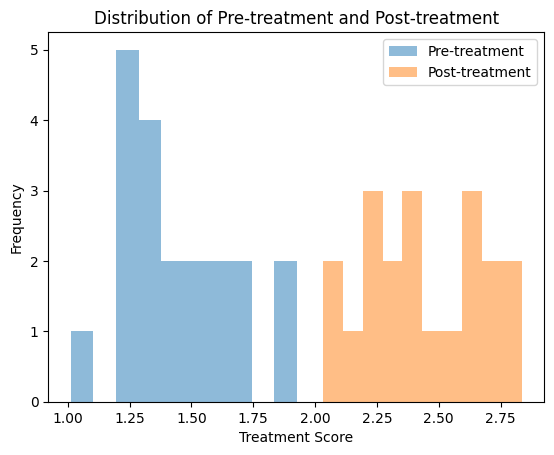

In [181]:
# Visualization: Histogram
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

## 3.4. Multiple Testing

In [23]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

In [95]:
# Load data
data = pd.read_csv('./data/treatment_data2.csv')

data

,pre_treatment,post_treatment
0,3,6
1,7,7
2,7,10
3,9,8
4,3,6
5,1,3
6,6,5
7,3,3
8,2,-1
9,8,5


- rejects_bonf
  - 각 가설에 대한 기각 여부를 나타내는 불리언 배열
  - rejects_bonf[i]는 i번째 가설이 기각되었는지 여부
- corrected_p_bonf
  - 보정된 p-값들의 배열
  - corrected_p_bonf[i]는 i번째 가설의 보정된 p-값

In [122]:
# Multiple Testing
p_values = []

print("Before 'Borferroni Correction:'\n")
for i in range(10):
    # Get a sample data
    sample = data.sample(frac=0.5)
    
    # Wilcoxon Signed Rank Test
    stat, p = wilcoxon(sample['pre_treatment'], sample['post_treatment'])
    
    # Print
    print('Sample', i+1, ': ')
    print('\tStatistics: ', stat)
    print('\tP-value: ', p)
    
    p_values.append(p)
    
    if p > 0.05:
        print('\tSame distribution (Fail to reject H0)\n')
    else:
        print('\tDifferent distribution (Reject H0)\n')

        
print("After 'Borferroni Correction:'\n")
alpha = 0.05
rejects_bonf, corrected_p_bonf, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')
for i in range(len(rejects_bonf)):
    if rejects_bonf[i]:
        print(f"sample : {i+1} : Reject HO")
    else:
        print(f"sample : {i+1} : Fail to reject HO")

Before 'Borferroni Correction:'

Sample 1 : 
	Statistics:  10.5
	P-value:  0.5498063307054615
	Same distribution (Fail to reject H0)

Sample 2 : 
	Statistics:  15.0
	P-value:  0.36396207510247747
	Same distribution (Fail to reject H0)

Sample 3 : 
	Statistics:  12.0
	P-value:  0.7316005889599013
	Same distribution (Fail to reject H0)

Sample 4 : 
	Statistics:  7.5
	P-value:  0.2623135752307827
	Same distribution (Fail to reject H0)

Sample 5 : 
	Statistics:  16.0
	P-value:  0.4314014169471778
	Same distribution (Fail to reject H0)

Sample 6 : 
	Statistics:  5.0
	P-value:  0.034808478811867126
	Different distribution (Reject H0)

Sample 7 : 
	Statistics:  10.0
	P-value:  0.9141283452014198
	Same distribution (Fail to reject H0)

Sample 8 : 
	Statistics:  12.0
	P-value:  0.7316005889599013
	Same distribution (Fail to reject H0)

Sample 9 : 
	Statistics:  10.5
	P-value:  0.2864220227778588
	Same distribution (Fail to reject H0)

Sample 10 : 
	Statistics:  11.0
	P-value:  0.608220942070240

## 3.5. Visualization: Boxplot

In [135]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import seaborn as sns

In [182]:
# Load data
data = pd.read_csv('./data/treatment_data.csv')

data

,pre_treatment,post_treatment
0,5,1
1,7,6
2,12,1
3,8,9
4,15,6
5,18,5
6,9,8
7,2,4
8,13,4
9,9,6


In [183]:
# Wilcoxon Rank-Sum Test
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


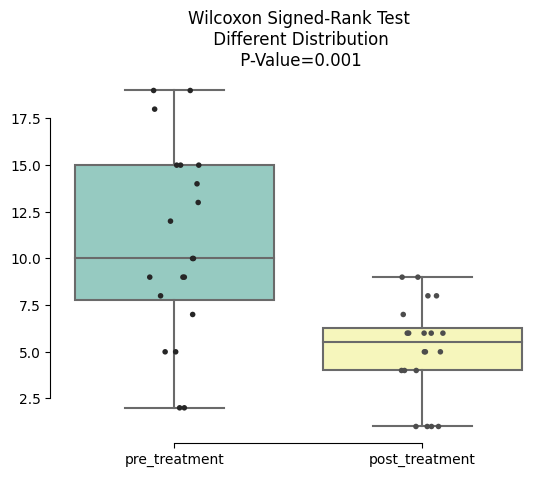

In [184]:
# Visualization: Boxplot
sns.boxplot(data=data[['pre_treatment', 'post_treatment']], palette="Set3")
sns.stripplot(data=data[['pre_treatment', 'post_treatment']], 
              color=".3",
              size=4)
sns.despine(trim=True)

if p > 0.05:
    plt.title('Wilcoxon Signed-Rank Test\n Same Distribution\n P-Value=%.3f' % (p))
else:
    plt.title('Wilcoxon Signed-Rank Test\n Different Distribution\n P-Value=%.3f' % (p))

plt.show()

# 4. Wincoxon Rank-Sum Test

In [144]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [145]:
# Generate data
data = {
    'group1' : [3, 2, 5, 1, 4, 2, 6, 7, 9, 8],
    'group2' : [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]
}

{'group1': [3, 2, 5, 1, 4, 2, 6, 7, 9, 8],
 'group2': [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]}

In [146]:
# Create a dataframe
df = pd.DataFrame(data)

df

,group1,group2
0,3,6
1,2,4
2,5,7
3,1,2
4,4,6
5,2,3
6,6,7
7,7,9
8,9,10
9,8,11


In [147]:
# Save as a csv file
df.to_csv('./data/mannwhitneyu_sample_data', index=False, encoding='utf-8')

In [148]:
# CHeck the data
data = pd.read_csv('./data/mannwhitneyu_sample_data')

data

,group1,group2
0,3,6
1,2,4
2,5,7
3,1,2
4,4,6
5,2,3
6,6,7
7,7,9
8,9,10
9,8,11


In [154]:
# Wilcoxon Rank-Sum Test
stat, p = mannwhitneyu(data['group1'], data['group2'])
print(stat, '\n', p)

32.5 
 0.19622288836173518


In [156]:
# Get a result
if p > 0.05:
    print("Fail to Reject H0")
else:
    print("Reject H0")

Fail to Reject H0


C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


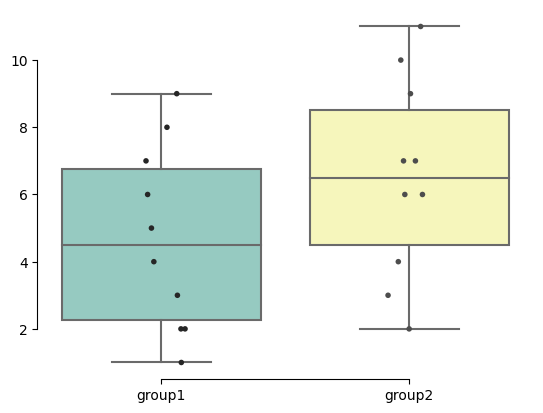

In [157]:
# Visualization: Boxplot

sns.boxplot(data=data[['group1', 'group2']], palette="Set3")
sns.stripplot(data=data[['group1', 'group2']], color='.3', size=4)
sns.despine(trim=True)
plt.show()

# 6. Homogeneity of Variances - Levene's Test

In [171]:
# Import modules
import pandas as pd
from scipy.stats import levene

In [172]:
# Load data
data = pd.read_csv('./data/mannwhitneyu_sample_data')
data

,group1,group2
0,3,6
1,2,4
2,5,7
3,1,2
4,4,6
5,2,3
6,6,7
7,7,9
8,9,10
9,8,11


In [173]:
# Levene's Test
stat, p = levene(data['group1'], data['group2'])

print(stat, '\n', p)

0.0 
 1.0


In [174]:
# Result
if p > 0.05:
    print('Fail to Reject H0')
else:
    print('Reject H0')

Fail to Reject H0


# 7. Wilcoxon-Mann-Whitney Test

- H0: Median values in two groups are the same
- H1: Median values in two groups are different

## 7.1. Basics

In [186]:
# Import modules
from scipy.stats import mannwhitneyu

In [187]:
# Generate data
group1 = [3, 2, 5, 1, 4, 2, 6, 7, 9, 8]
group2 = [6, 4, 7, 2, 6, 3, 7, 9, 10, 11]

In [188]:
# Wilcoxon-Mann U Test
stat, p = mannwhitneyu(group1, group2)

print(stat, '\n', p)

32.5 
 0.19622288836173518


In [190]:
print('Mann-Whitney U Statistic: ', stat)
print('P-Value: ', p)

Mann-Whitney U Statistic:  32.5
P-Value:  0.19622288836173518


In [191]:
# Get a result
if p > 0.05:
    print("Fail to Reject H0")
else:
    print("Reject H0")

Fail to Reject H0


## 3.2. Calcualte `P-Value`

In [193]:
# Import modules
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy import stats

In [194]:
# Load data
data = pd.read_csv('./data/mannwhitneyu_sample_data')

data

,group1,group2
0,3,6
1,2,4
2,5,7
3,1,2
4,4,6
5,2,3
6,6,7
7,7,9
8,9,10
9,8,11


In [195]:
# Mann-Whitney U Test
st, p = mannwhitneyu(data['group1'], data['group2'])

print(st, '\n',p)

32.5 
 0.19622288836173518


In [196]:
# Calculate the lengths of two groups
n1, n2 = len(data['group1']), len(data['group2'])

print(n1, n2)

10 10


In [198]:
# Use (n1 * n2 - U) when 'u' value is big
if st > n1 * n2 / 2:
    st = n1 * n2 - st

In [199]:
# Calculate p-value
p_value = 2 * stats.norm.cdf(-abs(st) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12))

print('Mann-Whitney U Statistic: ', st)
print('P-Value: ', p)

Mann-Whitney U Statistic:  32.5
P-Value:  0.19622288836173518


## 7.3. Excercise: Sleep Time Dataset

In [200]:
# Import modules
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

In [203]:
# Generate data
np.random.seed(85)
group1 = np.random.normal(loc=6, scale=1.5, size=100)
group2 = np.random.normal(loc=7, scale=1.5, size=100)

group1, group2


(array([6.26527608, 9.56663119, 7.49809929, 4.0347738 , 6.27028488,
        3.35286897, 3.8353112 , 3.90107166, 7.230531  , 7.94294898,
        7.41329613, 5.65210157, 5.05290305, 5.03673446, 5.4274926 ,
        3.35483399, 8.41750232, 4.68283742, 5.2521344 , 7.3608651 ,
        6.06199413, 8.72321211, 4.30478857, 5.2914795 , 5.25376367,
        6.05840517, 8.06429209, 6.73714853, 6.88036633, 4.0738255 ,
        8.66986547, 4.06650246, 4.82438565, 4.41159364, 5.38914188,
        5.63654287, 7.66068492, 6.10935092, 3.88123981, 5.39211002,
        3.75886992, 7.46980589, 6.61776042, 7.13325391, 6.24688363,
        6.10786224, 6.17882729, 7.52108684, 4.50071238, 6.88680075,
        4.48566461, 6.45718982, 4.07892443, 5.13429372, 6.26132584,
        8.23643217, 4.99670048, 5.68755505, 4.50699277, 6.14634722,
        3.60656299, 8.4861998 , 8.8299886 , 6.94287394, 6.5633215 ,
        5.89190813, 7.268671  , 5.46770739, 5.89930567, 4.94629009,
        5.26892683, 7.47713674, 6.97455801, 8.57

In [206]:
# Create a DataFrame
data = pd.DataFrame({'group1' : group1 , 'group2': group2})

data

,group1,group2
0,6.265276,5.015301
1,9.566631,6.469467
2,7.498099,6.339885
3,4.034774,7.170823
4,6.270285,7.991504
...,...,...
95,4.014622,7.291070
96,6.356900,8.219964
97,4.868600,8.545868
98,4.096240,6.178866


In [208]:
# Save as a csv file
data.to_csv('./data/sleep_data.csv', index=False, encoding='utf-8')

In [209]:
# Check the file
sleep_data = pd.read_csv('./data/sleep_data.csv')

sleep_data

,group1,group2
0,6.265276,5.015301
1,9.566631,6.469467
2,7.498099,6.339885
3,4.034774,7.170823
4,6.270285,7.991504
...,...,...
95,4.014622,7.291070
96,6.356900,8.219964
97,4.868600,8.545868
98,4.096240,6.178866


In [210]:
# Create columns
group1_data = data['group1']
group2_data = data['group2']

group1_data, group2_data

(0     6.265276
 1     9.566631
 2     7.498099
 3     4.034774
 4     6.270285
         ...   
 95    4.014622
 96    6.356900
 97    4.868600
 98    4.096240
 99    7.679147
 Name: group1, Length: 100, dtype: float64,
 0     5.015301
 1     6.469467
 2     6.339885
 3     7.170823
 4     7.991504
         ...   
 95    7.291070
 96    8.219964
 97    8.545868
 98    6.178866
 99    5.342979
 Name: group2, Length: 100, dtype: float64)

In [212]:
# Mann-Whitney U Test
stat, p = mannwhitneyu(data['group1'], 
                       data['group2'],
                      alternative='two-sided')  # Set Two-sided test

stat, p

(3267.0, 2.3041891560020393e-05)

In [213]:
# Result
if p < 0.05:
    print('H0 rejected (There are differences between group1 and group2)')
else:
    print('H0 adopted(There are no differences between gorup1 and group2)')
    

H0 rejected (There are differences between group1 and group2)


# 8. Kruskal-Wallis H Test

- H0: Mean values are the same among all groups
- H1: Mean values are different among all groups   


- p-value < 0.05: H0 is rejected

In [217]:
# Import modules
import numpy as np
from scipy.stats import kruskal

In [221]:
# Generate data
np.random.seed(85)

group1 = np.random.normal(loc=5, scale=1, size=20)
group2 = np.random.normal(loc=7, scale=1, size=25)
group3 = np.random.normal(loc=10, scale=1, size=15)

print('Group1: \n', group1, '\n')
print('Group2: ', group2, '\n')
print('Group3: ', group3, '\n')

Group1: 
 [5.17685072 7.37775412 5.99873286 3.6898492  5.18018992 3.23524598
 3.55687413 3.60071444 5.820354   6.29529932 5.94219742 4.76806771
 4.36860203 4.35782298 4.6183284  3.236556   6.61166821 4.12189161
 4.50142293 5.9072434 ] 

Group2:  [7.04132942 8.81547474 5.86985905 6.527653   6.50250912 7.03893678
 8.37619473 7.49143236 7.58691089 5.71588367 8.77991031 5.71100164
 6.2162571  5.94106242 6.59276125 6.75769525 8.10712328 7.07290062
 5.58749321 6.59474001 5.50591328 7.9798706  7.41184028 7.75550261
 7.16458909] 

Group3:  [10.07190816 10.11921819 11.01405789  9.00047492 10.5912005   8.99044307
 10.30479321  8.71928295  9.42286248 10.17421722 11.49095478  9.33113365
  9.79170337  9.00466185 10.09756482] 



In [223]:
#Kruskal-Wallis H Test
H, p = kruskal(group1, group2, group3)

print('Kruskal-Wallis H Test: ', H)
print('P-Value: ', p)

Kruskal-Wallis H Test:  44.12746448087435
P-Value:  2.617235713219655e-10


# 9. Friedman Test

- Hypothesis
  - H0: No differences
  - H1: At least one difference

In [226]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare

In [235]:
# Generate data
np.random.seed(85)
group1 = np.random.normal(loc=10, scale=2, size=10)
group2 = np.random.normal(loc=12, scale=2, size=10)
group3 = np.random.normal(loc=15, scale=2, size=10)

print('Group1: \n', group1)
print('\nGroup2: \n', group2)
print('\nGroup3: \n', group3)

Group1: 
 [10.35370144 14.75550825 11.99746571  7.37969841 10.36037984  6.47049196
  7.11374826  7.20142889 11.640708   12.59059864]

Group2: 
 [13.88439484 11.53613542 10.73720407 10.71564595 11.2366568   8.47311199
 15.22333643 10.24378322 11.00284587 13.8144868 ]

Group3: 
 [15.08265883 18.63094948 12.7397181  14.055306   14.00501823 15.07787356
 17.75238946 15.98286471 16.17382178 12.43176733]


In [236]:
# Stack data
data = np.stack([group1, group2, group3], axis=1) # np.stack(): Stack data in columns

data

array([[10.35370144, 13.88439484, 15.08265883],
       [14.75550825, 11.53613542, 18.63094948],
       [11.99746571, 10.73720407, 12.7397181 ],
       [ 7.37969841, 10.71564595, 14.055306  ],
       [10.36037984, 11.2366568 , 14.00501823],
       [ 6.47049196,  8.47311199, 15.07787356],
       [ 7.11374826, 15.22333643, 17.75238946],
       [ 7.20142889, 10.24378322, 15.98286471],
       [11.640708  , 11.00284587, 16.17382178],
       [12.59059864, 13.8144868 , 12.43176733]])

In [237]:
# Friedman Test
stat, p = friedmanchisquare(*data.T)  # `data.T`: Transpose the array -> Pass each array as a seperate factor
                                      # `*`: Unpack an array

print('Result of Friedman Test')
print(f"Statistics: {stat}")
print(f"P-Value: {p}")

Result of Friedman Test
Statistics: 10.400000000000006
P-Value: 0.005516564420760756


In [239]:
# Result
if p < 0.05:
    print('H0 is rejected')
else:
    print('H0 is adopted')

H0 is rejected


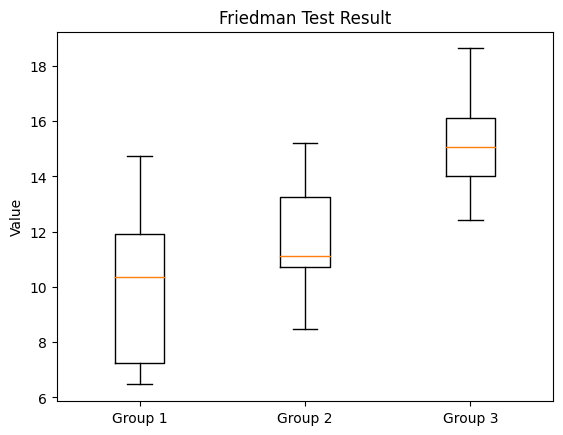

In [240]:
# Visualization: Boxplot
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3'])
ax.set_ylabel('Value')
ax.set_title('Friedman Test Result')
plt.show()